In [1]:
import numpy as np

# Generate a legendre basis of size `size`
def legendre_basis(size):
    basis = []
    for i in range(size):
        coeffs = np.zeros(size)
        coeffs[i] = 1
        basis.append(np.polynomial.legendre.Legendre(coeffs))
    return basis

In [2]:
# Generate the Aliasing Operator norm plot as we move each next basis function into the modeled space.

def aliasing_operator(basis_functions, sample_points, model_size: int) -> tuple[np.ndarray, float]:
    """
    Given a set of basis functions and sample points, compute the aliasing operator A and its 2-norm.

    Parameters:
    - basis_functions: List of callable basis functions.
    - sample_points: Array of sample points where the basis functions are evaluated.
    - model_size: Number of basis functions to consider as modeled (the rest are unmode
    led).
    """
    # M_top = [M_TM | M_TU]
    M_top_half = np.array([p(sample_points) for p in basis_functions]).T # so that rows are sample points, cols are basis functions

    M_TM, M_TU = M_top_half[:,:model_size], M_top_half[:,model_size:]
    M_TM_plus = np.linalg.pinv(M_TM)

    # A = M_TM^+ @ M_TU
    return (A := M_TM_plus @ M_TU), np.linalg.norm(A, ord=2).astype(float)



In [7]:
import matplotlib.pyplot as plt

m = 150  # Total number of basis functions (Modeled + Unmodeled)
n = 300
complete_legendre_basis = legendre_basis(m)  # Full basis

modeled_functions = m-50  # Pick a number of fixed modeled basis functions


norms_uniform = []
norms_legendre = []
norms_regular = []


for n in range(1, n+1):
    # Pick Uniformly random points to sample our basis at
    np.random.seed(0)
    uniform_points = np.random.uniform(-1, 1, n)

    # Pick Legendre-Gauss points to sample our basis at
    legendre_gauss_points, _ = np.polynomial.legendre.leggauss(n)

    # Compute the aliasing operator and its norm for both sampling strategies
    A_uniform, norm_uniform = aliasing_operator(complete_legendre_basis, uniform_points, model_size=modeled_functions)
    A_legendre, norm_legendre = aliasing_operator(complete_legendre_basis, legendre_gauss_points, model_size=modeled_functions)
    A_regular, norm_regular = aliasing_operator(complete_legendre_basis, np.linspace(-1, 1, n), model_size=modeled_functions)

    norms_uniform.append(norm_uniform)
    norms_legendre.append(norm_legendre)
    norms_regular.append(norm_regular)
    print(f"n={n}, Uniform Norm={norm_uniform}, Legendre Norm={norm_legendre}, Regular Norm={norm_regular}")

n=1, Uniform Norm=0.23801708203780186, Legendre Norm=0.23685940201335495, Regular Norm=0.707106781186555
n=2, Uniform Norm=0.3086440994854807, Legendre Norm=0.2694567354414491, Regular Norm=0.7071067811865646
n=3, Uniform Norm=0.3389866849739622, Legendre Norm=0.28988671315790676, Regular Norm=0.7080488239373629
n=4, Uniform Norm=1.0700753268555707, Legendre Norm=0.30720458830927766, Regular Norm=0.7100117311040994
n=5, Uniform Norm=1.0700772983728337, Legendre Norm=0.3099685941957387, Regular Norm=0.7110009799414568
n=6, Uniform Norm=1.0705744549820544, Legendre Norm=0.31014064088694704, Regular Norm=0.7103856673892128
n=7, Uniform Norm=1.0865468335016153, Legendre Norm=0.32206688374647285, Regular Norm=0.7129623049446804
n=8, Uniform Norm=1.0865895882545187, Legendre Norm=0.3266864330577957, Regular Norm=0.7118815960754216
n=9, Uniform Norm=1.086786134007973, Legendre Norm=0.36076999998008813, Regular Norm=0.7131565054198914
n=10, Uniform Norm=1.088724824276039, Legendre Norm=0.31437

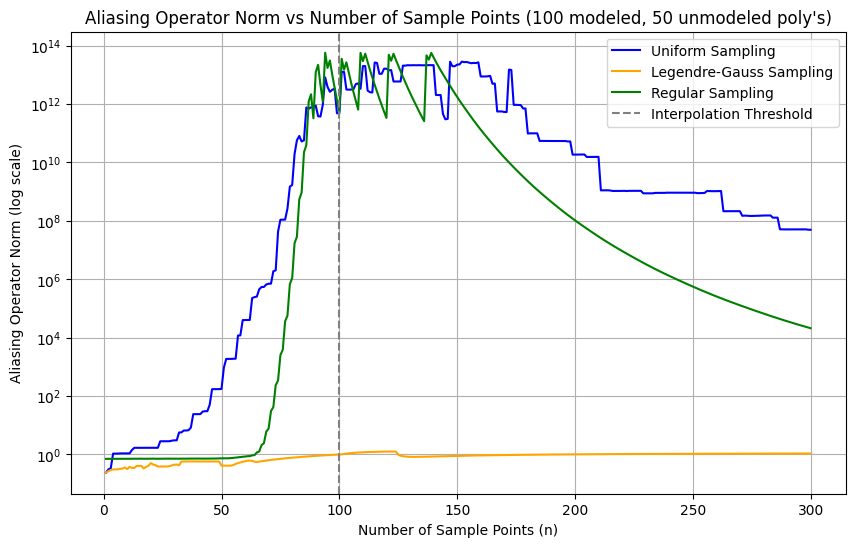

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), norms_uniform, label="Uniform Sampling", color="blue")
plt.plot(range(1, n+1), norms_legendre, label="Legendre-Gauss Sampling", color="orange")
plt.plot(range(1, n+1), norms_regular, label="Regular Sampling", color="green")
plt.axvline(x=modeled_functions, color="gray", linestyle="--", label="Interpolation Threshold")
plt.yscale("log")
plt.xlabel("Number of Sample Points (n)")
plt.ylabel("Aliasing Operator Norm (log scale)")
plt.title(f"Aliasing Operator Norm vs Number of Sample Points ({modeled_functions} modeled, {m-modeled_functions} unmodeled poly's)")
plt.legend()
plt.grid(True)
plt.show()
